In [ ]:
# Install the libraries you will need

### TextBlob which is a NLP library built on top of NLTK )..
!pip install textblob

!pip install wordcloud

## 2.2.0 is a most stable version till date , hence installing this version makes sense !
!pip install emoji==2.2.0 

!pip install regex

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud , STOPWORDS
import re
import emoji
from collections import Counter



In [12]:
%%capture

df = pd.read_csv(r'D:\Path/UScomments.csv', error_bad_lines=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [14]:
## find out missing values in your data
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [15]:
## drop missing values
df.dropna(inplace=True)
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [16]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## 1- Preform Sentiment Analysis on Youtube Comments

In [17]:
polarity=[]

for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)



- **sentiment.polarity** : 
                            if polarity < 0           ----------->          -1  Negative Sentiment
                            if polarity = 0           ----------->           0  Neutral Sentiment
                            if polarity > 0           ----------->           1  Positive  Sentiment 


In [18]:
%%capture

df['polarity']=polarity

df['pol'] = 'Neutral Sentiment'

df['pol'][df.polarity == 0]='Neutral Sentiment' 
df['pol'][df.polarity > 0]= 'Positive Sentiment'
df['pol'][df.polarity < 0]= 'Negative Sentiment'

df.head(20)

## 2- Wordcloud Analysis

### A) Comments Positive Sentences

In [19]:
P_Comments = df[df['polarity']>0.8]

In [20]:
P_Comments.head()

,video_id,comment_text,likes,replies,polarity,pol
64,XpVt6Z1Gjjo,yu are the best,1,0,1.000,Positive Sentiment
98,XpVt6Z1Gjjo,*eyyyjooooo Good morning loooganng WHATS POPPP...,2,0,0.875,Positive Sentiment
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.000,Positive Sentiment
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.000,Positive Sentiment
307,sjlHnJvXdQs,This is priceless,0,0,1.000,Positive Sentiment


In [ ]:
# We'll delete these words out of the wordcloud
set(STOPWORDS)

In [22]:
### for wordcloud , we need to frame our 'comment_text' feature into string 
Total_P_Comments = ' '.join(P_Comments['comment_text'])

In [23]:
len(Total_P_Comments)

1355114

In [24]:
wordcloudp = WordCloud(width= 2000, height = 1000, stopwords=set(STOPWORDS)).generate(Total_P_Comments)


(-0.5, 1999.5, 999.5, -0.5)

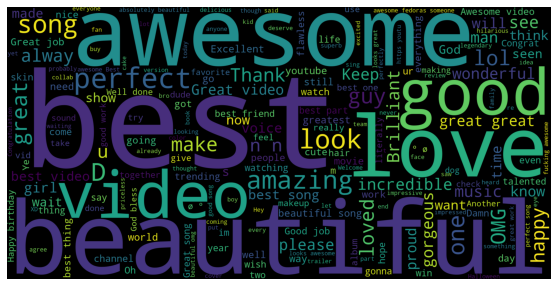

In [25]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloudp)
plt.axis('off')

### B) Comments Negative Sentences

In [26]:
N_Comments = df[df['polarity'] < -0.8]

In [27]:
N_Comments.head()

,video_id,comment_text,likes,replies,polarity,pol
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.000,Negative Sentiment
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.000,Negative Sentiment
684,_HTXMhKWqnA,Yay! Another stupidly overpriced iPhone!,0,0,-1.000,Negative Sentiment
815,zgLtEob6X-Q,Say- I gotta case of the swamp ass and it itch...,0,0,-0.875,Negative Sentiment
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.000,Negative Sentiment


In [28]:
### for wordcloud , we need to frame our 'comment_text' feature into string 
Total_N_Comments = ' '.join(N_Comments['comment_text'])

In [29]:
len(Total_N_Comments)

247614

In [30]:
wordcloudn = WordCloud(width= 2000, height = 1000, stopwords=set(STOPWORDS)).generate(Total_N_Comments)


(-0.5, 1999.5, 999.5, -0.5)

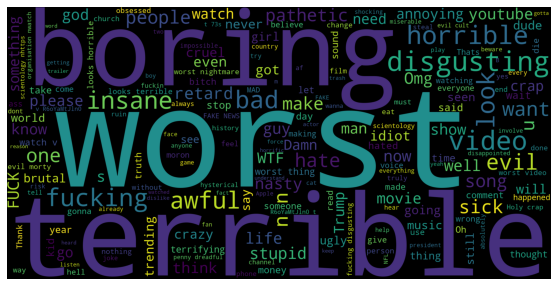

In [31]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloudn)
plt.axis('off')

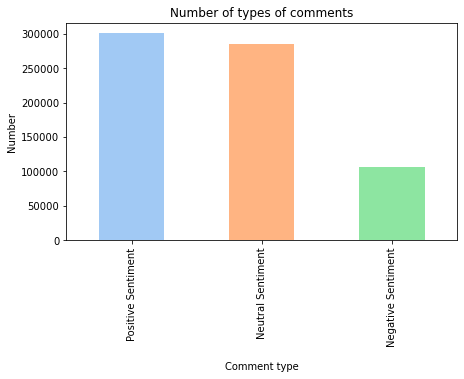

In [32]:
color_palette = sns.color_palette("pastel")

df['pol'].value_counts().plot(kind='bar', figsize=(7, 4), color=color_palette)
plt.title('Number of types of comments')
plt.xlabel('Comment type', labelpad=15)
plt.ylabel('Number')
plt.show()

### C) Tags

In [59]:
%%capture

df2 = pd.read_csv(r'D:\Path/USvideos.csv' , error_bad_lines=False)


In [34]:
df2.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [35]:
Tags =(' '.join(df2['tags']))

In [36]:
df2['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [37]:
# Accept a to z, A to Z and replace everything else with a blank
Tags = re.sub('[^a-z A-Z]',' ',Tags)

In [38]:
# remove extra spaces
Tags = re.sub(' +',' ',Tags)

(-0.5, 1999.5, 999.5, -0.5)

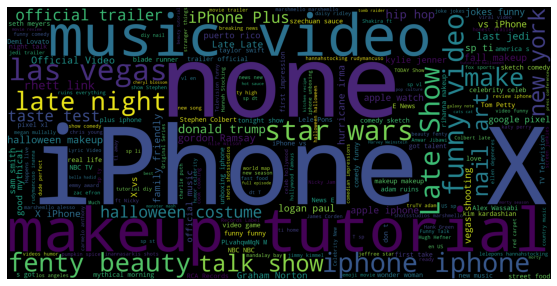

In [39]:
# What are the common words in the field of tags

wordcloud = WordCloud(width= 2000, height = 1000, stopwords=set(STOPWORDS)).generate(Tags)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')

### Relation between views, likes and dislikes

Text(0.5, 1.0, 'Relation between likes and views')

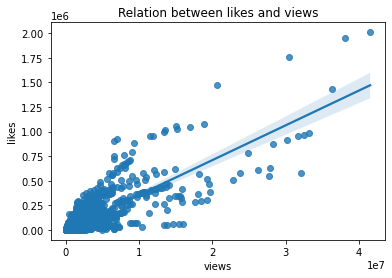

In [40]:
sns.regplot(data = df2,x = 'views' , y = 'likes')
plt.title('Relation between likes and views')

Text(0.5, 1.0, 'Relation between dislikes and views')

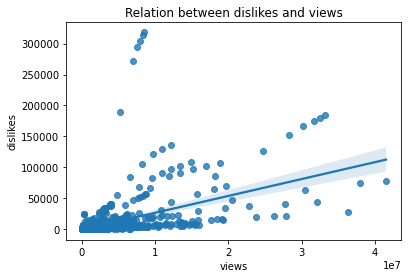

In [41]:
sns.regplot(data = df2,x = 'views' , y = 'dislikes')
plt.title('Relation between dislikes and views')

In [42]:
View = df2[['views','likes','dislikes']]

<AxesSubplot: >

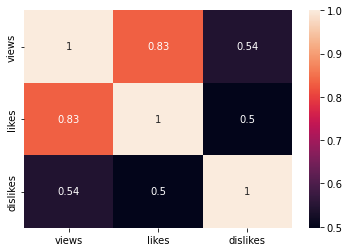

In [43]:
sns.heatmap(View.corr(),annot=True)

## Emoji's Analysis

In [44]:
comment = '😮 😮 😮 Awesome 😮 😮 😮'
[char for char in comment if char in emoji.EMOJI_DATA]

['😮', '😮', '😮', '😮', '😮', '😮']

In [45]:
emojis_list = []

for comment in df['comment_text']:
    for emojii in  comment:
        if emojii in emoji.EMOJI_DATA:
            emojis_list.append(emojii)
         

In [46]:
len(set(emojis_list))

1098

In [47]:
emojis_list[20:30]

['❤', '😂', '❤', '💎', '😆', '😆', '😆', '😆', '😆', '😆']

In [48]:
All_Emojis = [Counter(emojis_list)]


In [49]:
Counter(emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [50]:
Counter(emojis_list).most_common(10)[0][0]

'😂'

In [51]:
Top_Emojis = [Counter(emojis_list).most_common(10)[i][0] for i in range(10)]

In [52]:
Top_Emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [53]:
Emoji_df = pd.DataFrame(All_Emojis).T.reset_index()

Emoji_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1098 non-null   object
 1   0       1098 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.3+ KB


In [54]:
Emoji_df.columns = ['emoji', 'repetition'] 


In [55]:
Emoji_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emoji       1098 non-null   object
 1   repetition  1098 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.3+ KB


In [56]:
Emoji_df

,emoji,repetition
0,‼,211
1,😉,998
2,😭,8398
3,👍,5476
4,🏻,3438
...,...,...
1093,⏺,2
1094,⏹,2
1095,⏯,2
1096,🧡,11


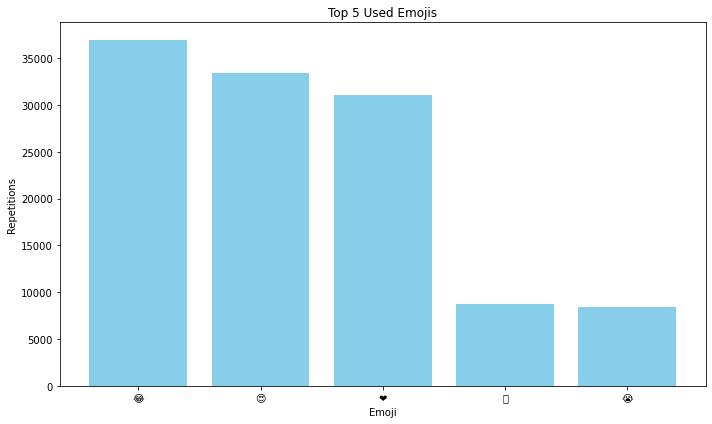

In [57]:
# Sorting DataFrame by repetition counts
sorted_df = Emoji_df.sort_values(by='repetition', ascending=False)

# Selecting top 5 emojis
top_5_emojis = sorted_df.head(5)

# Plotting a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_emojis['emoji'], top_5_emojis['repetition'], color='skyblue')
plt.xlabel('Emoji')
plt.ylabel('Repetitions')
plt.title('Top 5 Used Emojis')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()